**Plot the absolute error of |numerical 1st moment-analytic stationary 1st moment| and relative error of |numerical 2nd moment-analytic 2nd momebt|/ (analytic 2nd moment) for ALL four schemes: Euler Maruyama, Milstein, Stochastic Heun and Improved 3 stage Runge-Kutta.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set font properties
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 14

def compute_moments(eta, x0, T, h_array):
    """
    Compute moment evolution and errors for different numerical methods.

    Parameters
    ----------
    eta : float
        Model parameter
    x0 : float
        Initial condition
    T : float
        Final time
    h_array : array
        Array of timestep sizes

    Returns
    -------
    results : dict
        Dictionary containing time arrays, exact moments, and numerical moments
    """
    results = {}

    for h in h_array:
        t_array = np.arange(0, T + h, h)
        Nt = len(t_array) - 1

        # Exact moments
        ext_Mom1st = x0 * np.exp(-t_array)

        if eta == 1:
            ext_Mom2nd = (x0**2 * np.exp(-t_array) +
                         1 - np.exp(-t_array) +
                         2 * x0 * t_array * np.exp(-t_array))
        else:
            ext_Mom2nd = (x0**2 * np.exp(-(2 - eta**2) * t_array) +
                         1 / (2 - eta**2) * (1 - np.exp(-(2 - eta**2) * t_array)) +
                         2 * eta * x0 / (1 - eta**2) *
                         (np.exp(-t_array) - np.exp(-(2 - eta**2) * t_array)))

        # Common ratios
        evl_h_ratio = 1 - h
        evl_h_ratio_sq = evl_h_ratio**2

        # Initialize moment arrays
        Mom1st_EM = np.zeros(Nt + 1)
        Mom2nd_EM = np.zeros(Nt + 1)
        Mom1st_Mil = np.zeros(Nt + 1)
        Mom2nd_Mil = np.zeros(Nt + 1)
        Mom1st_SH = np.zeros(Nt + 1)
        Mom2nd_SH = np.zeros(Nt + 1)
        Mom1st_RK3 = np.zeros(Nt + 1)
        Mom2nd_RK3 = np.zeros(Nt + 1)

        # Initial conditions
        Mom1st_EM[0] = Mom1st_Mil[0] = Mom1st_SH[0] = Mom1st_RK3[0] = x0
        Mom2nd_EM[0] = Mom2nd_Mil[0] = Mom2nd_SH[0] = Mom2nd_RK3[0] = x0**2

        # EM method coefficients
        for i in range(Nt):
            Mom1st_EM[i + 1] = evl_h_ratio * Mom1st_EM[i]
            Mom2nd_EM[i + 1] = ((1 - h)**2 + h * eta**2) * Mom2nd_EM[i] + \
                               2 * h * eta * Mom1st_EM[i] + h

        # Milstein method coefficients
        Mil_h_ratio = h + 0.5 * h**2 * eta**2
        for i in range(Nt):
            Mom1st_Mil[i + 1] = evl_h_ratio * Mom1st_Mil[i]
            Mom2nd_Mil[i + 1] = (evl_h_ratio_sq * Mom2nd_Mil[i] +
                                Mil_h_ratio * (1 + 2 * eta * Mom1st_Mil[i] +
                                              eta**2 * Mom2nd_Mil[i]))

        # Stochastic Heun method coefficients
        SH_h_ratio1 = 1 - h + 1/8 * h**2 * (2 + eta**2)**2
        SH_h_ratio2 = 1/8 * eta * h**2 * (2 + eta**2)
        SH_h_ratio3 = (h - 1/2 * h**2 * (2 + eta**2) +
                      1/4 * h**3 * (1 + eta**2)**2 +
                      1/64 * h**3 * eta**2 * (2 + eta**2)**2)
        SH_h_ratio4 = (2 * h * eta - 1/4 * h**2 * eta * (10 + 3 * eta**2) +
                      1/4 * h**3 * eta * (2 + 5 * eta**2 + 2 * eta**4) +
                      1/32 * h**4 * eta * (2 + eta**2)**3)
        SH_h_ratio5 = (1 - h * (2 - eta**2) -
                      1/4 * h**2 * ((2 + eta**2)**2 - 12) +
                      1/4 * h**3 * (eta**6 + 3 * eta**4 - 4) +
                      1/64 * h**4 * (2 + eta**2)**4)

        for i in range(Nt):
            Mom1st_SH[i + 1] = SH_h_ratio1 * Mom1st_SH[i] + SH_h_ratio2
            Mom2nd_SH[i + 1] = (SH_h_ratio3 + SH_h_ratio4 * Mom1st_SH[i] +
                               SH_h_ratio5 * Mom2nd_SH[i])

        # 3-stage Runge-Kutta (RK3) coefficients
        RK3_h_ratio1 = (-1/24 * h**2 * eta * (2 + 3 * eta**2) -
                       1/48 * h**3 * eta * (2 + eta**2)**2)
        RK3_h_ratio2 = (1 - h + 1/8 * h**2 * (4 - eta**4) -
                       1/48 * h**3 * (2 + eta**2)**3)
        RK3_h_ratio3 = (h - 1/2 * h**2 * (2 - eta**2) +
                       1/12 * h**3 * (8 - eta**4) -
                       1/192 * h**4 * (32 + 20 * eta**2 - 44 * eta**4 - 27 * eta**6) +
                       1/288 * h**5 * (2 + eta**2)**2 * (2 + 7 * eta**2 + 6 * eta**4) +
                       1/2304 * h**6 * eta**2 * (2 + eta**2)**4)
        RK3_h_ratio4 = (2 * h * eta - 1/12 * h**2 * eta * (38 - 9 * eta**2) +
                       1/24 * h**3 * eta * (56 + 2 * eta**2 - 5 * eta**4) -
                       1/96 * h**4 * eta * (72 + 44 * eta**2 - 50 * eta**4 - 27 * eta**6) +
                       1/72 * h**5 * eta * (2 + eta**2)**3 * (1 + 3 * eta**2) +
                       1/1152 * h**6 * eta * (2 + eta**2)**5)
        RK3_h_ratio5 = (1 - h * (2 - eta**2) +
                       1/4 * h**2 * (8 - 8 * eta**2 + eta**4) -
                       1/24 * h**3 * (32 - 36 * eta**2 + 3 * eta**6) +
                       1/192 * h**4 * (2 + eta**2)**2 * (28 - 52 * eta**2 + 27 * eta**6) -
                       1/96 * h**5 * (2 + eta**2)**4 * (1 - 2 * eta**2) +
                       1/2304 * h**6 * (2 + eta**2)**6)

        for i in range(Nt):
            Mom1st_RK3[i + 1] = RK3_h_ratio1 + RK3_h_ratio2 * Mom1st_RK3[i]
            Mom2nd_RK3[i + 1] = (RK3_h_ratio3 + RK3_h_ratio4 * Mom1st_RK3[i] +
                                RK3_h_ratio5 * Mom2nd_RK3[i])

        # Store results
        results[h] = {
            't_array': t_array,
            'ext_Mom1st': ext_Mom1st,
            'ext_Mom2nd': ext_Mom2nd,
            'Mom1st_EM': Mom1st_EM,
            'Mom2nd_EM': Mom2nd_EM,
            'Mom1st_Mil': Mom1st_Mil,
            'Mom2nd_Mil': Mom2nd_Mil,
            'Mom1st_SH': Mom1st_SH,
            'Mom2nd_SH': Mom2nd_SH,
            'Mom1st_RK3': Mom1st_RK3,
            'Mom2nd_RK3': Mom2nd_RK3
        }

    return results


def plot_moment_errors(eta, results, h_array, moment_type='first'):
    """
    Plot moment errors for all methods and timestep sizes.

    Parameters
    ----------
    eta : float
        Model parameter
    results : dict
        Results dictionary from compute_moments
    h_array : array
        Array of timestep sizes
    moment_type : str
        'first' or 'second'
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for idx, h in enumerate(h_array):
        ax = axes[idx]
        data = results[h]
        t = data['t_array']

        if moment_type == 'first':
            ext_mom = data['ext_Mom1st']
            err_EM = np.abs(data['Mom1st_EM'] - ext_mom)
            err_Mil = np.abs(data['Mom1st_Mil'] - ext_mom)
            err_SH = np.abs(data['Mom1st_SH'] - ext_mom)
            err_RK3 = np.abs(data['Mom1st_RK3'] - ext_mom)
            ylabel = 'Abs Error of First Moment'
        else:  # second moment
            ext_mom = data['ext_Mom2nd']
            err_EM = np.abs(data['Mom2nd_EM'] - ext_mom) / (ext_mom + np.finfo(float).eps)
            err_Mil = np.abs(data['Mom2nd_Mil'] - ext_mom) / (ext_mom + np.finfo(float).eps)
            err_SH = np.abs(data['Mom2nd_SH'] - ext_mom) / (ext_mom + np.finfo(float).eps)
            err_RK3 = np.abs(data['Mom2nd_RK3'] - ext_mom) / (ext_mom + np.finfo(float).eps)
            ylabel = 'Rel Error of Second Moment'

        # Plot with different line styles
        ax.semilogy(t, err_EM, 'r-', label='EM', linewidth=1.5)
        ax.semilogy(t, err_Mil, 'b-.', label='Milstein', linewidth=1.5)
        ax.semilogy(t, err_SH, ':', color='orange', label='SH', linewidth=2)
        ax.semilogy(t, err_RK3, 'g--', label='RK3', linewidth=1.5)

        if moment_type == 'first':
           if eta == 0.1:
              ax.set_ylim([0, 0.02])
           else:
              ax.set_ylim([0, 0.05])
        else:
           if eta == 0.1:
              ax.set_ylim([0, 0.02])
           else:
              ax.set_ylim([0, 2])

        ax.set_title(f'η = {eta}, h = {h}')
        ax.set_xlabel('Time')
        ax.grid(True, alpha=0.3)

        if idx == 0:
            ax.set_ylabel(ylabel)
        if idx == 1:
            ax.legend(loc='best')

    plt.tight_layout()
    return fig


# Main execution
if __name__ == "__main__":
    # Model settings
    x0 = 1.0
    T = 20.0
    h_array = np.array([0.001, 0.005, 0.025])

    # Compute for eta = 0.1
    print("Computing for η = 0.1...")
    results_01 = compute_moments(eta=0.1, x0=x0, T=T, h_array=h_array)

    # Compute for eta = 1.41
    print("Computing for η = 1.41...")
    results_141 = compute_moments(eta=1.41, x0=x0, T=T, h_array=h_array)

    # Plot first moment errors
    print("Plotting first moment errors...")
    fig1 = plot_moment_errors(0.1, results_01, h_array, moment_type='first')
    # fig1.suptitle('First Moment Errors: η = 0.1', fontsize=16, y=1.02)

    fig2 = plot_moment_errors(1.41, results_141, h_array, moment_type='first')
    # fig2.suptitle('First Moment Errors: η = 1.41', fontsize=16, y=1.02)

    # Plot second moment errors
    print("Plotting second moment errors...")
    fig3 = plot_moment_errors(0.1, results_01, h_array, moment_type='second')
    # fig3.suptitle('Second Moment Errors: η = 0.1', fontsize=16, y=1.02)

    fig4 = plot_moment_errors(1.41, results_141, h_array, moment_type='second')
    # fig4.suptitle('Second Moment Errors: η = 1.41', fontsize=16, y=1.02)

    plt.show()

    # Optional: save figures
    fig1.savefig('first_moment_eta_01.pdf', bbox_inches='tight', dpi=300)
    fig2.savefig('first_moment_eta_141.pdf', bbox_inches='tight', dpi=300)
    fig3.savefig('second_moment_eta_01.pdf', bbox_inches='tight', dpi=300)
    fig4.savefig('second_moment_eta_141.pdf', bbox_inches='tight', dpi=300)

**Plots of numerical stability  $h$  vs  $\eta$  regions for the first and secod moments for each scheme, respectively, in each subplot.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Set font properties
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 14

def compute_stability_regions():
    """
    Compute and plot the stability regions (h vs eta) of first and second moments
    for various numerical methods.
    """

    # Parameter settings
    N = 1001

    # Step 1: Define the range for eta and h
    h_array = np.linspace(0.001, 2.6, N)
    eta_array = np.linspace(0, np.sqrt(2), N)

    # Step 2: Create a grid of points
    X, Y = np.meshgrid(eta_array, h_array)

    # Step 3: Define the function f(x, y) for 2nd moment stability
    F_SH = np.zeros((N, N))
    F_Mil = np.zeros((N, N))
    F_EM = np.zeros((N, N))
    F_IRK3 = np.zeros((N, N))
    F_IRK3_1st = np.zeros((N, N))

    ## Second Moment stability constraint

    # Euler-Maruyama
    EM_stab = lambda eta, h: (1 - h)**2 + h * eta**2

    # Milstein
    Mil_stab = lambda eta, h: (1 - h)**2 + h * eta**2 + 0.5 * h**2 * eta**4

    # Stochastic Heun method
    const1 = lambda eta: (2 - eta**2)
    const2 = lambda eta: (4 * eta**2 + eta**4 - 8) / 4
    const3 = lambda eta: (-4 + 3 * eta**4 + eta**6) / 4
    const4 = lambda eta: (2 + eta**2)**4 / 64
    SH_stab = lambda eta, h: (1 - h * const1(eta) - h**2 * const2(eta) +
                              h**3 * const3(eta) + h**4 * const4(eta))

    # IRK3 method
    const5 = lambda eta: (8 - 8 * eta**2 + eta**4) / 4
    const6 = lambda eta: (32 - 36 * eta**2 + 3 * eta**6) / 24
    const7 = lambda eta: (2 + eta**2)**2 * (28 - 52 * eta**2 + 27 * eta**4) / 192
    const8 = lambda eta: (2 + eta**2)**4 * (1 - 2 * eta**2) / 96
    const9 = lambda eta: (2 + eta**2)**6 / 2304

    IRK3_stab = lambda eta, h: (1 - h * const1(eta) + h**2 * const5(eta) -
                                h**3 * const6(eta) + h**4 * const7(eta) -
                                h**5 * const8(eta) + h**6 * const9(eta))

    # Compute stability functions on the grid
    for i in range(N):
        h = h_array[i]
        for j in range(N):
            eta = eta_array[j]
            F_EM[i, j] = EM_stab(eta, h)
            F_Mil[i, j] = Mil_stab(eta, h)
            F_SH[i, j] = SH_stab(eta, h)
            F_IRK3[i, j] = IRK3_stab(eta, h)

    # Determine stability regions (where |F| < 1)
    stab_F_EM = np.abs(F_EM) < 1
    stab_F_Mil = np.abs(F_Mil) < 1
    stab_F_SH = np.abs(F_SH) < 1
    stab_F_IRK3 = np.abs(F_IRK3) < 1

    # First moment stability constraints
    h_1stMom_cond_EM = 2 * np.ones_like(eta_array)
    h_1stMom_cond_Mil = 2 * np.ones_like(eta_array)
    h_1stMom_cond_SH = 2.0 / ((1 + 0.5 * eta_array**2)**2)

    ## First moment stability constraint for IRK3
    aa = lambda eta: (2 + eta**2)**3 / 48
    bb = lambda eta: -(4 - eta**4) / 8
    cc = 1
    dd = -2

    h_1stMom_cond_IRK3 = np.zeros_like(eta_array)

    for i in range(N):
        h = h_array[i]
        for j in range(N):
            eta = eta_array[j]
            F_IRK3_1st[i, j] = (1 - h + 1/8 * h**2 * (4 - eta**4) -
                               1/48 * h**3 * (2 + eta**2)**3)

    for i in range(N):
        eta = eta_array[i]
        a = aa(eta)
        b = bb(eta)
        c = cc
        d = dd
        coefficients = [a, b, c, d]
        roots_of_polynomial = np.roots(coefficients)
        h_1stMom_cond_IRK3[i] = max(0, np.max(np.real(roots_of_polynomial)))

    return (X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3,
            eta_array, h_1stMom_cond_EM, h_1stMom_cond_Mil,
            h_1stMom_cond_SH, h_1stMom_cond_IRK3)


def plot_all_methods_subplots(X, Y, stab_F_EM, stab_F_Mil, stab_F_SH,
                              stab_F_IRK3, eta_array, h_1stMom_cond_EM,
                              h_1stMom_cond_Mil, h_1stMom_cond_SH,
                              h_1stMom_cond_IRK3, cmap='Pastel1'):
    """
    Plot all 4 methods in a 2x2 subplot layout.

    Parameters
    ----------
    cmap : str
        Colormap to use. Options: 'Pastel1', 'Pastel2', 'Accent', 'Set3', etc.
    """

    fig, axes = plt.subplots(1, 4, figsize=(20, 16))

    # Flatten axes for easier iteration
    ax_flat = axes.flatten()

    # Data for each subplot
    methods = [
        ('EM', stab_F_EM, h_1stMom_cond_EM),
        ('Milstein', stab_F_Mil, h_1stMom_cond_Mil),
        ('SH', stab_F_SH, h_1stMom_cond_SH),
        ('RK3', stab_F_IRK3, h_1stMom_cond_IRK3)
    ]

    for idx, (method_name, stab_F, h_1stMom_cond) in enumerate(methods):
        ax = ax_flat[idx]

        # Plot stability region with contourf
        cs = ax.contourf(X, Y, stab_F, levels=[0, 0.5, 1],
                        cmap=cmap, alpha=0.8)

        # Plot first moment stability boundary
        ax.plot(eta_array, h_1stMom_cond, 'k-', linewidth=2.0)

        # Add contour lines for better visualization
        ax.contour(X, Y, stab_F, levels=[0.5], colors='gray',
                  linewidths=1, linestyles='--', alpha=0.5)

        # Formatting
        ax.set_xlabel(r'$\eta$', fontsize=14)
        ax.set_ylabel(r'$h$', fontsize=14)
        ax.set_aspect('equal')
        ax.set_title(method_name, fontsize=16, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)


        # Set axis limits for better visualization
        ax.set_xlim([0, np.sqrt(2)])
        ax.set_ylim([0, 2.6])

    plt.tight_layout()
    return fig


def plot_all_methods_subplots_alternate(X, Y, stab_F_EM, stab_F_Mil, stab_F_SH,
                                        stab_F_IRK3, eta_array, h_1stMom_cond_EM,
                                        h_1stMom_cond_Mil, h_1stMom_cond_SH,
                                        h_1stMom_cond_IRK3):
    """
    Alternative version with different colors for each subplot.
    Uses individual colors from Accent colormap.
    """

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Flatten axes for easier iteration
    ax_flat = axes.flatten()

    # Get colors from Accent colormap
    accent_colors = plt.cm.Accent(np.linspace(0, 1, 8))

    # Data for each subplot with individual colors
    methods = [
        ('EM', stab_F_EM, h_1stMom_cond_EM, accent_colors[0]),
        ('Milstein', stab_F_Mil, h_1stMom_cond_Mil, accent_colors[2]),
        ('SH', stab_F_SH, h_1stMom_cond_SH, accent_colors[4]),
        ('RK3', stab_F_IRK3, h_1stMom_cond_IRK3, accent_colors[6])
    ]

    for idx, (method_name, stab_F, h_1stMom_cond, color) in enumerate(methods):
        ax = ax_flat[idx]

        # Create custom colormap for this subplot
        from matplotlib.colors import LinearSegmentedColormap
        colors_list = ['white', color]
        n_bins = 256
        custom_cmap = LinearSegmentedColormap.from_list('custom', colors_list, N=n_bins)

        # Plot stability region with contourf
        cs = ax.contourf(X, Y, stab_F, levels=[0, 0.5, 1],
                        cmap=custom_cmap, alpha=0.75)

        # Plot first moment stability boundary
        ax.plot(eta_array, h_1stMom_cond, 'k-', linewidth=2.5,
               label='1st moment boundary')

        # Add contour lines for better visualization
        ax.contour(X, Y, stab_F, levels=[0.5], colors='darkgray',
                  linewidths=1.5, linestyles='--')

        # Formatting
        ax.set_xlabel(r'$\eta$', fontsize=14)
        ax.set_ylabel(r'$h$', fontsize=14)
        ax.set_aspect('equal')
        ax.set_title(method_name, fontsize=16, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
        ax.legend(loc='upper right', fontsize=11)

        # Set axis limits for better visualization
        ax.set_xlim([0, np.sqrt(2)])
        ax.set_ylim([0, 2.6])

    plt.tight_layout()
    return fig


# Main execution
if __name__ == "__main__":
    print("Computing stability regions...")
    (X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3,
     eta_array, h_1stMom_cond_EM, h_1stMom_cond_Mil,
     h_1stMom_cond_SH, h_1stMom_cond_IRK3) = compute_stability_regions()

    print("Creating subplot figure with coolwarm...")
    fig1 = plot_all_methods_subplots(
        X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3,
        eta_array, h_1stMom_cond_EM, h_1stMom_cond_Mil,
        h_1stMom_cond_SH, h_1stMom_cond_IRK3, cmap='coolwarm'
    )




    # Optional: save figures
    # fig1.savefig('stability_all_methods_Pastel.pdf', bbox_inches='tight', dpi=300)
    # fig2.savefig('stability_all_methods_Accent.pdf', bbox_inches='tight', dpi=300)
    # fig3.savefig('stability_all_methods_custom.pdf', bbox_inches='tight', dpi=300)

**Plots of numerical stability  $h$  vs  $\eta$  regions for the first and secod moments for all schemes.**

Computing stability regions...
Creating combined plot...


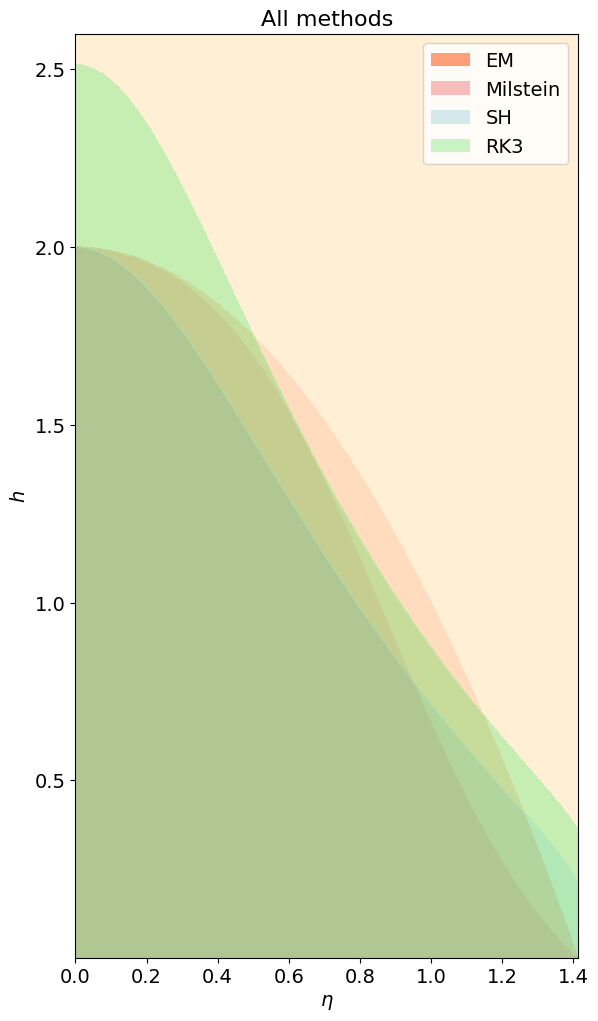

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

def compute_stability_regions():
    """
    Compute and plot the stability regions (h vs eta) of first and second moments
    for various numerical methods.
    """

    # Parameter settings
    N = 1001

    # Step 1: Define the range for eta and h
    h_array = np.linspace(0.001, 2.6, N)
    eta_array = np.linspace(0, np.sqrt(2), N)

    # Step 2: Create a grid of points
    X, Y = np.meshgrid(eta_array, h_array)

    # Step 3: Define the function f(x, y) for 2nd moment stability
    F_SH = np.zeros((N, N))
    F_Mil = np.zeros((N, N))
    F_EM = np.zeros((N, N))
    F_IRK3 = np.zeros((N, N))
    F_IRK3_1st = np.zeros((N, N))

    ## Second Moment stability constraint

    # Euler-Maruyama
    EM_stab = lambda eta, h: (1 - h)**2 + h * eta**2

    # Milstein
    Mil_stab = lambda eta, h: (1 - h)**2 + h * eta**2 + 0.5 * h**2 * eta**4

    # Stochastic Heun method
    const1 = lambda eta: (2 - eta**2)
    const2 = lambda eta: (4 * eta**2 + eta**4 - 8) / 4
    const3 = lambda eta: (-4 + 3 * eta**4 + eta**6) / 4
    const4 = lambda eta: (2 + eta**2)**4 / 64
    SH_stab = lambda eta, h: (1 - h * const1(eta) - h**2 * const2(eta) +
                              h**3 * const3(eta) + h**4 * const4(eta))

    # IRK3 method
    const5 = lambda eta: (8 - 8 * eta**2 + eta**4) / 4
    const6 = lambda eta: (32 - 36 * eta**2 + 3 * eta**6) / 24
    const7 = lambda eta: (2 + eta**2)**2 * (28 - 52 * eta**2 + 27 * eta**4) / 192
    const8 = lambda eta: (2 + eta**2)**4 * (1 - 2 * eta**2) / 96
    const9 = lambda eta: (2 + eta**2)**6 / 2304

    IRK3_stab = lambda eta, h: (1 - h * const1(eta) + h**2 * const5(eta) -
                                h**3 * const6(eta) + h**4 * const7(eta) -
                                h**5 * const8(eta) + h**6 * const9(eta))

    # Compute stability functions on the grid
    for i in range(N):
        h = h_array[i]
        for j in range(N):
            eta = eta_array[j]
            F_EM[i, j] = EM_stab(eta, h)
            F_Mil[i, j] = Mil_stab(eta, h)
            F_SH[i, j] = SH_stab(eta, h)
            F_IRK3[i, j] = IRK3_stab(eta, h)

    # Determine stability regions (where |F| < 1)
    stab_F_EM = np.abs(F_EM) < 1
    stab_F_Mil = np.abs(F_Mil) < 1
    stab_F_SH = np.abs(F_SH) < 1
    stab_F_IRK3 = np.abs(F_IRK3) < 1

    # First moment stability constraints
    h_1stMom_cond_EM = 2 * np.ones_like(eta_array)
    h_1stMom_cond_Mil = 2 * np.ones_like(eta_array)
    h_1stMom_cond_SH = 2.0 / ((1 + 0.5 * eta_array**2)**2)

    ## First moment stability constraint for IRK3
    aa = lambda eta: (2 + eta**2)**3 / 48
    bb = lambda eta: -(4 - eta**4) / 8
    cc = 1
    dd = -2

    h_1stMom_cond_IRK3 = np.zeros_like(eta_array)

    for i in range(N):
        h = h_array[i]
        for j in range(N):
            eta = eta_array[j]
            F_IRK3_1st[i, j] = (1 - h + 1/8 * h**2 * (4 - eta**4) -
                               1/48 * h**3 * (2 + eta**2)**3)

    for i in range(N):
        eta = eta_array[i]
        a = aa(eta)
        b = bb(eta)
        c = cc
        d = dd
        coefficients = [a, b, c, d]
        roots_of_polynomial = np.roots(coefficients)
        h_1stMom_cond_IRK3[i] = max(0, np.max(np.real(roots_of_polynomial)))

    return (X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3,
            eta_array, h_1stMom_cond_EM, h_1stMom_cond_Mil,
            h_1stMom_cond_SH, h_1stMom_cond_IRK3)


def plot_combined_stability_regions(X, Y, stab_F_EM, stab_F_Mil, stab_F_SH,
                                   stab_F_IRK3, eta_array):
    """Plot combined stability regions with overlapping contours."""

    fig, ax = plt.subplots(figsize=(16, 12))

    # Use different colormaps for each method with transparency
    # The stable regions are shown with filled contours

    # EM - Blues colormap
    cs1 = ax.contourf(X, Y, stab_F_EM,
                     colors=['papayawhip', 'orangered'], alpha=0.9)

    # Milstein - Reds colormap
    cs2 = ax.contourf(X, Y, stab_F_Mil, levels=[0, 0.5, 1],
                     colors=['papayawhip', 'lightcoral'], alpha=0.5)

    # Stochastic Heun - Greens colormap
    cs3 = ax.contourf(X, Y, stab_F_SH, levels=[0, 0.5, 1],
                     colors=['papayawhip', 'lightblue'], alpha=0.5)

    # RK3 - Purples colormap
    cs4 = ax.contourf(X, Y, stab_F_IRK3,levels = [0, 0.5, 1],
                     colors=['papayawhip', 'lightgreen'], alpha=0.5)

    ax.set_xlabel(r'$\eta$', fontsize=14)
    ax.set_ylabel(r'$h$', fontsize=14)
    ax.set_aspect('equal')
    ax.set_title('All methods', fontsize=16)
    #ax.grid(True, alpha=0.3)

    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='orangered', alpha=0.5, label='EM'),
        Patch(facecolor='lightcoral', alpha=0.5, label='Milstein'),
        Patch(facecolor='lightblue', alpha=0.5, label='SH'),
        Patch(facecolor='lightgreen', alpha=0.5, label='RK3')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=14)

    return fig



# Main execution
if __name__ == "__main__":
    print("Computing stability regions...")
    (X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3,
     eta_array, h_1stMom_cond_EM, h_1stMom_cond_Mil,
     h_1stMom_cond_SH, h_1stMom_cond_IRK3) = compute_stability_regions()


    print("Creating combined plot...")
    fig5 = plot_combined_stability_regions(
        X, Y, stab_F_EM, stab_F_Mil, stab_F_SH, stab_F_IRK3, eta_array
    )


    plt.show()

